In [5]:
# Import Libraries
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erajkovic\AppData\Roaming\nltk_data...


True

In [13]:
tweets = pd.read_csv('../text_twitter_type_raw.csv')
print(tweets.Type.unique())
tweets

['none' 'sexism' 'racism']


,Text,Type,Label
0,@username @username @username I read them in c...,none,negative
1,@username Now you idiots claim that people who...,none,negative
2,"RT @username Call me sexist, but when I go to ...",sexism,positive
3,"@username Wrong, ISIS follows the example of M...",racism,positive
4,#mkr No No No No No No,none,negative
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,negative
16847,#MKR 'pretty good dishes we're happy with' - O...,none,negative
16848,RT @username Deconstructed lemon tart!....can ...,none,negative
16849,@username @username @username You are too stup...,none,negative


In [18]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

    
for index, tweet in tweets.iterrows():
 
    tweet_list.append(tweet.Text)
    analysis = TextBlob(tweet.Text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.Text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.Text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.Text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.Text)
        neutral += 1
        

NameError: name 'noOfTweet' is not defined

In [19]:
noOfTweet = 16851
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [21]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  16851
positive number:  5394
negative number:  6815
neutral number:  4642


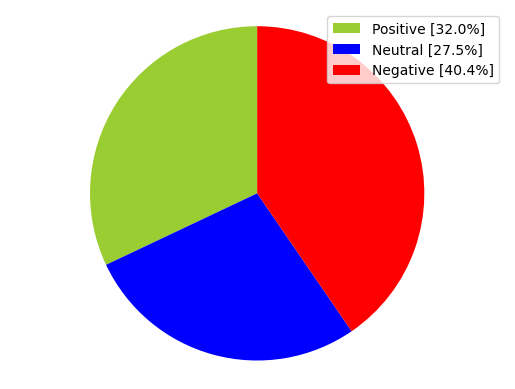

In [23]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.axis('equal')
plt.show()

In [26]:
print(tweet_list)
tweet_list.drop_duplicates(inplace = True)

                                                       0
0      @username @username @username I read them in c...
1      @username Now you idiots claim that people who...
2      RT @username Call me sexist, but when I go to ...
3      @username Wrong, ISIS follows the example of M...
4                                 #mkr No No No No No No
...                                                  ...
16846  Feeling so sorry for the girls, they should be...
16847  #MKR 'pretty good dishes we're happy with' - O...
16848  RT @username Deconstructed lemon tart!....can ...
16849  @username @username @username You are too stup...
16850  And before you protest that you're *not* mad, ...

[16778 rows x 1 columns]


In [28]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',"",x)
rt = lambda x: re.sub('(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',"",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@username @username @username I read them in c...,i read them in contextno change in meaning ...
1,@username Now you idiots claim that people who...,now you idiots claim that people who tried to...
2,"RT @username Call me sexist, but when I go to ...",rt call me sexist but when i go to an auto pl...
3,"@username Wrong, ISIS follows the example of M...",wrong isis follows the example of mohammed an...
4,#mkr No No No No No No,mkr no no no no no no
5,RT @username http://t.co/nkkCbpcHEo Saudi prea...,rt saudi preacher who raped and tortured his...
6,RT @username @username nooo not sexist but mos...,rt nooo not sexist but most women are bad dr...
7,Going to make some pancakes.....Don't hve any ...,going to make some pancakesdont hve any strawb...
8,RT @username @username How dare you have feeli...,rt how dare you have feelings is a fantastic...
9,RT @username There's something wrong when a gi...,rt theres something wrong when a girl wins wa...


In [31]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
    
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@username @username @username I read them in c...,i read them in contextno change in meaning ...,0.000000,0.000000,negative,0.286,0.714,0.00,-0.7003
1,@username Now you idiots claim that people who...,now you idiots claim that people who tried to...,-0.183333,0.683333,negative,0.498,0.502,0.00,-0.9509
2,"RT @username Call me sexist, but when I go to ...",rt call me sexist but when i go to an auto pl...,0.000000,0.000000,neutral,0.000,1.000,0.00,0.0000
3,"@username Wrong, ISIS follows the example of M...",wrong isis follows the example of mohammed an...,-0.125000,0.575000,negative,0.237,0.763,0.00,-0.4767
4,#mkr No No No No No No,mkr no no no no no no,0.000000,0.000000,negative,0.930,0.070,0.00,-0.8807
5,RT @username http://t.co/nkkCbpcHEo Saudi prea...,rt saudi preacher who raped and tortured his...,0.000000,0.000000,negative,0.482,0.518,0.00,-0.9201
6,RT @username @username nooo not sexist but mos...,rt nooo not sexist but most women are bad dr...,-0.100000,0.583333,negative,0.364,0.636,0.00,-0.7307
7,Going to make some pancakes.....Don't hve any ...,going to make some pancakesdont hve any strawb...,0.000000,0.000000,neutral,0.000,1.000,0.00,0.0000
8,RT @username @username How dare you have feeli...,rt how dare you have feelings is a fantastic...,0.400000,0.900000,positive,0.171,0.610,0.22,0.2023
9,RT @username There's something wrong when a gi...,rt theres something wrong when a girl wins wa...,-0.100000,0.550000,positive,0.185,0.595,0.22,0.1531


In [33]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [35]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,6964,41.51
positive,5215,31.08
neutral,4599,27.41


In [51]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(open("../cloud.png"))
    STOPWORDS.add('rt')
    wc = WordCloud(background_color="white",
        mask = None,
        max_words=3000,
        stopwords=set(STOPWORDS),
        repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print('Word Cloud Saved Successfully')
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


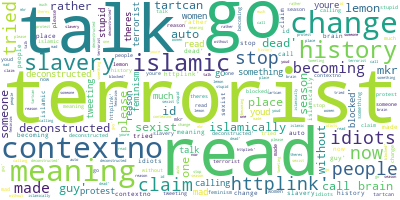

In [52]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


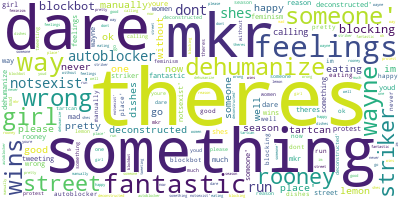

In [54]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


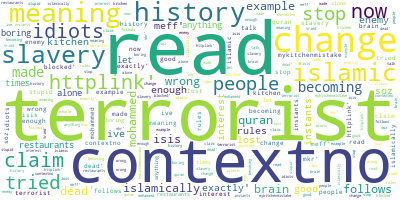

In [56]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


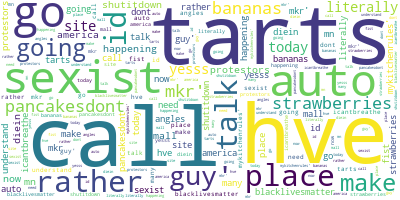

In [57]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_neutral["text"].values)